# For Leaders

In [ ]:
# hypothesis testing

- proposed explanation for a phenomenon

1 - Null Hypothesis (H0) -> it is considered true till it proven false.
2 - Alternative Hypothesis (H1) -> it is negation of the null hypothesis

- explore data
- select any test to collect avidance
- test-statistics - accept or reject the alternative hypothesis
- convert this test-statistics to a p-value

p-value -> will tell us that the test statistics that you got- 
whether if is due to random chance and luck or whether it is actually significant

significance level -> threshold for luck - 5% - 0.05 < p-value (reject the Alternative Hypothesis)
                                                0.05 > p-value (reject the null hypothesis)


# a large p-value indicates that the results are due to luck.


- A/B testing - online marketing - we have to test which website layout is driving more conversions
A(New layout of website) B(old layout of website)

- healthcare - drug efficacy - wheather a new drug is more effective in trating a disease.

- anomaly detection - minimize false alarms


# confidence interval

- is a range of values derived from sample data -> estimate parameters of population
(use the degree of confidence)


- regression analysis - to estimate that the data points are likely to fall 
with a given level of confidence


# t-test

- difference in the means of two groups

- 2-sample T-Test (independent samples t-test) -> two distinct groups(male vs female)
- paired samples t-test(dependent samples t-test) 
        -> pre-treatment and post-treatment measurements(same person)
- one-sample t-test - 
- welch t-test - 

# For Engineers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/Health_insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


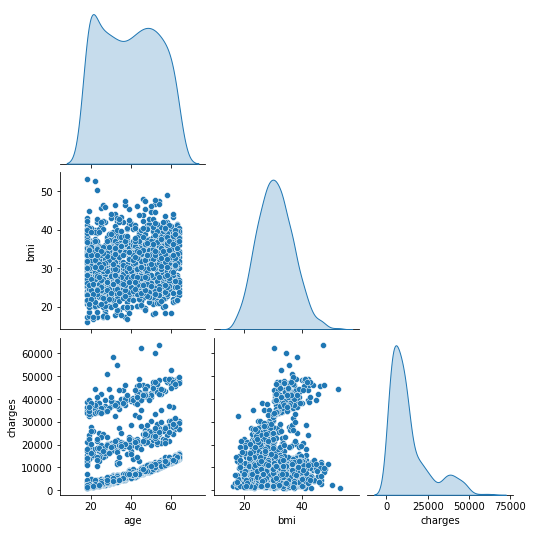

In [8]:
# age, bmi and charges
df_attr = df.iloc[:, [0,2,6]]

sns.pairplot(df_attr, diag_kind='kde', corner=True)

In [10]:
df_attr.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


In [9]:
# measure of skewness

df_attr.skew(axis=0, skipna=True)

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

In [11]:
plt.subplot?

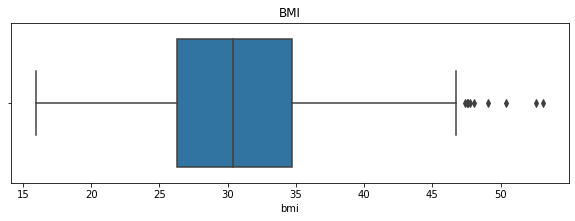

In [12]:
# outlier detection on bmi

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.title("BMI")

sns.boxplot(x=df['bmi'])
plt.show()

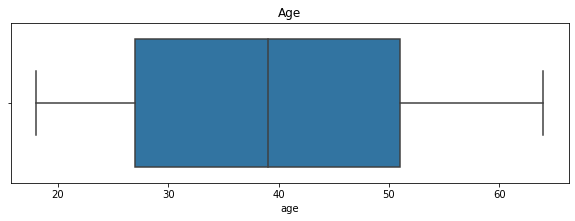

In [13]:
# outlier detection on age

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.title("Age")

sns.boxplot(x=df['age'])
plt.show()

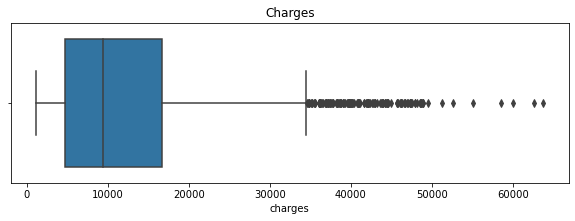

In [14]:
# outlier detection on charges

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.title("Charges")

sns.boxplot(x=df['charges'])
plt.show()

C:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


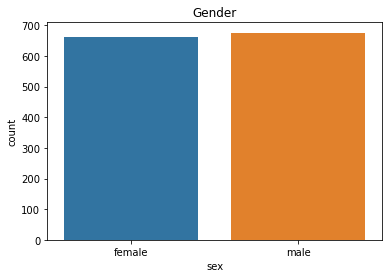

In [15]:
# gender

sns.countplot(df['sex'])
plt.title("Gender")

plt.show()

C:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


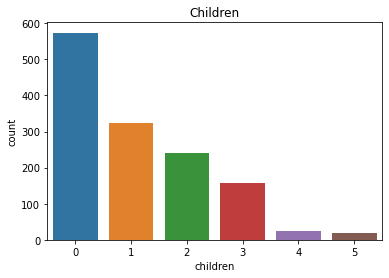

In [16]:
# children

sns.countplot(df['children'])
plt.title("Children")

plt.show()

C:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


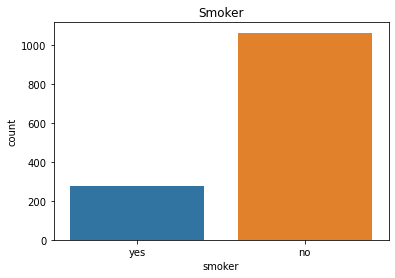

In [17]:
# Smoker

sns.countplot(df['smoker'])
plt.title("Smoker")

plt.show()

C:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


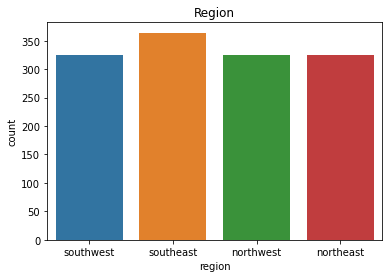

In [18]:
# region

sns.countplot(df['region'])
plt.title("Region")

plt.show()

In [19]:
import copy

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
df_encoded = copy.deepcopy(df)

le = LabelEncoder()

df_encoded.loc[:, ['sex', 'smoker', 'region']] = df_encoded.loc[:, ['sex', 'smoker', 'region']].apply(le.fit_transform)


In [22]:
df_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


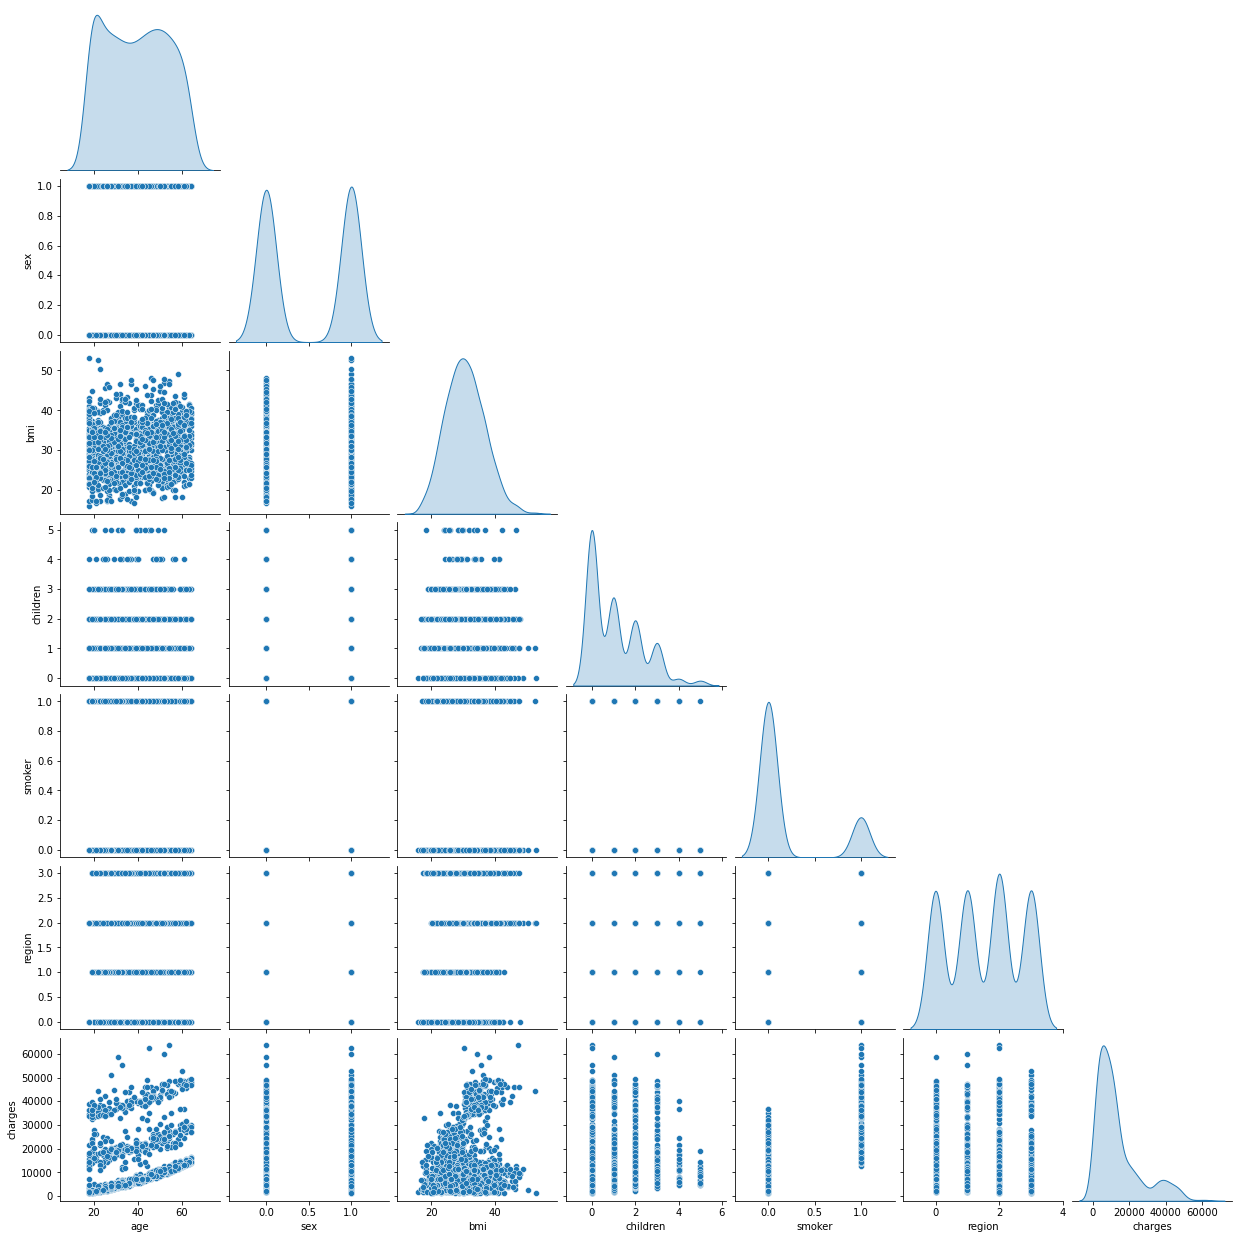

In [23]:
sns.pairplot(df_encoded, diag_kind='kde', corner=True)

plt.show()

In [ ]:
# Hypothesis testing

- Do charges of people who smoke differ significantly from the people who dont?



In [24]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='age', ylabel='charges'>

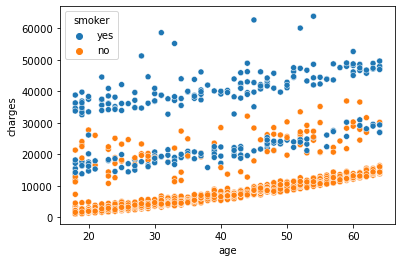

In [25]:
sns.scatterplot(x="age", y="charges", hue='smoker', data=df)

In [ ]:
H0 -> there is no difference in charges of smokers and non-smokers

H1 -> there is a difference in charges of smokers and non-smokers


significance level - 0.05 (alpha)

test -> 2 sample t-test

t-statistics

p-value

In [26]:
smoker_charges = df[df['smoker'] == 'yes'].charges

non_smoker_charges = df[df['smoker'] == 'no'].charges

In [27]:
from scipy.stats import ttest_ind

In [28]:
t_statistics, p_value = ttest_ind(smoker_charges, non_smoker_charges)

In [29]:
print("t_statistics:", t_statistics)

print("p_value:", p_value)

t_statistics: 46.66492117272371
p_value: 8.271435842179102e-283


In [30]:
reject_null = False

if p_value < 0.05:
    reject_null = True
else:
    reject_null = False
    
print("Reject Null?", reject_null)

Reject Null? True


In [ ]:
# Does bmi of males differ significantly from of female?

# Is the proportion of smokers significantly different in different genders?

# Is the bmi across women with no children, 1 child and 2 children are same?